In [1]:
import numpy as np

import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
import seaborn as sns
from typing import List, Set, Dict, Tuple

In [2]:
train_source_loc = 'naver/train_source.txt'
train_target_loc = 'naver/train_target.txt'

test_source_loc = 'naver/test_source.txt'
test_target_loc = 'naver/test_target.txt'

In [3]:
def open_process(file_loc):
    file = open(file_loc, 'r')
    file_lines = file.readlines()
    file_lines = [list(map(int, line.split())) for line in file_lines]
    return file_lines

In [4]:
train_source = open_process(train_source_loc)
train_target = open_process(train_target_loc)

test_source = open_process(test_source_loc)
test_target = open_process(test_target_loc)

train_src_vocab = set([i for line in train_source for i in line])
train_tgt_vocab = set([i for line in train_target for i in line])

test_src_vocab = set([i for line in test_source for i in line])
test_tgt_vocab = set([i for line in test_target for i in line])

train_src_vocab_dict = {value: idx for idx, value in enumerate(sorted(train_src_vocab))}
train_tgt_vocab_dict = {value: idx for idx, value in enumerate(sorted(train_tgt_vocab))}

test_src_vocab_dict = {value: idx for idx, value in enumerate(sorted(test_src_vocab))}
test_tgt_vocab_dict = {value: idx for idx, value in enumerate(sorted(test_tgt_vocab))}

train_src_vocab_size = len(train_src_vocab)
train_tgt_vocab_size = len(train_tgt_vocab)

test_src_vocab_size = len(test_src_vocab)
test_tgt_vocab_size = len(test_tgt_vocab)

In [5]:
train_source = [[train_src_vocab_dict[i] for i in seq] for seq in train_source]
train_target = [[train_tgt_vocab_dict[i] for i in seq] for seq in train_target]

test_source = [[test_src_vocab_dict[i] for i in seq] for seq in test_source]
test_target = [[test_tgt_vocab_dict[i] for i in seq] for seq in test_target]

68의 존재는 무엇인가

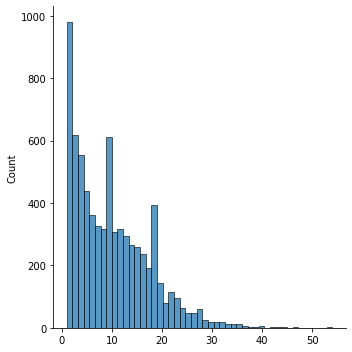

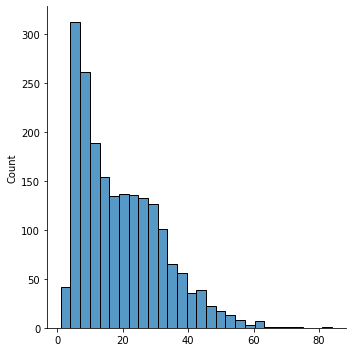

In [8]:
train_target_len = list(map(len, train_target))
sns.displot(train_target_len)

test_source_len = list(map(len, test_source))
sns.displot(test_source_len)

In [47]:
print(f'train source length: {len(train_source)}')
print(f'mean length: {int(np.mean([len(i) for i in train_source]))}')
print(f'max / min length: {len(max(train_source, key=len)), len(min(train_source, key=len))}')
print(f'vocab size: {len(train_src_vocab)}')
print('='*30)

print(f'train target length: {len(train_target)}')
print(f'mean length: {int(np.mean([len(i) for i in train_target]))}')
print(f'max / min length: {len(max(train_target, key=len)), len(min(train_target, key=len))}')
print(f'vocab size: {len(train_tgt_vocab)}')

print(f'test source length: {len(test_source)}')
print(f'mean length: {int(np.mean([len(i) for i in test_source]))}')
print(f'max / min length: {len(max(test_source, key=len)), len(min(test_source, key=len))}')
print(f'vocab size: {len(test_src_vocab)}')

print(f'test target length: {len(test_target)}')
print(f'mean length: {int(np.mean([len(i) for i in test_target]))}')
print(f'max / min length: {len(max(test_target, key=len)), len(min(test_target, key=len))}')
print(f'vocab size: {len(test_tgt_vocab)}')

train source length: 7260
mean length: 18
max / min length: (81, 2)
vocab size: 53
train target length: 7260
mean length: 10
max / min length: (54, 1)
vocab size: 595
test source length: 2000
mean length: 19
max / min length: (84, 1)
vocab size: 45
test target length: 2000
mean length: 10
max / min length: (54, 1)
vocab size: 495
